#**Classificação de Gatos e Cachorros com Transfer Learning**

A identificação de imagens é uma das áreas mais poderosas da inteligência artificial moderna. Neste projeto, propus um desafio simples e muito comum no campo da visão computacional: treinar um modelo capaz de distinguir entre imagens de **gatos e cachorros**.

Para isso, utilizei a técnica de **Transfer Learning**, que consiste em reaproveitar o conhecimento de um modelo já treinado em um grande conjunto de dados (neste caso, o MobileNetV2, pré-treinado no ImageNet) para resolver uma tarefa diferente — neste caso, classificar imagens como "gato" ou "cachorro".

---

## **O que foi feito**

- Carreguei e preparei um dataset dividido em três partes: **conjunto de treino**, **validação** e **teste**, todos organizados em pastas contendo imagens reais de gatos e cachorros.
- Utilizei o `ImageDataGenerator` para normalizar e dividir os dados automaticamente.
- Carreguei o modelo **MobileNetV2** sem o topo, congelei seus pesos e adicionei camadas finais para classificação binária.
- Realizei o treinamento por 5 épocas com ótimo desempenho.
- Avaliei o modelo usando o **conjunto de teste**, não visto durante o treino.
- Testei o modelo com imagens individuais, e ele previu corretamente as classes.

---

##**Resultados**

- Acurácia no treino e validação ficou próxima de **100%**, com **perda praticamente zero**.
- O modelo obteve **excelente acurácia no conjunto de teste**, mostrando boa capacidade de generalização.
- Nas imagens soltas (fora do conjunto de treino), o modelo classificou corretamente **gato** e **cachorro** com alta confiança.

---

##**Conclusão**

Este projeto demonstra como o **Transfer Learning** pode ser extremamente eficaz para tarefas de classificação de imagens, mesmo com um volume moderado de dados. Com poucos ajustes e tempo de treinamento reduzido, conseguimos construir um modelo robusto e confiável, que pode servir como base para aplicações reais — como apps de identificação de animais ou sistemas de monitoramento por imagem.

---


In [24]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img

In [14]:
with zipfile.ZipFile('cats_dogs_files.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [15]:
print(os.listdir('/content/data/cats_dogs_files'))
print(os.listdir('/content/data/cats_dogs_files/training_set'))
print(os.listdir('/content/data/cats_dogs_files/test_set'))

['training_set', 'test_set']
['cats', 'dogs']
['cats', 'dogs']


In [16]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/data/cats_dogs_files/training_set',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/data/cats_dogs_files/training_set',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

print('-=' * 20)
print(train_generator.samples)
print(val_generator.samples)
print(train_generator.class_indices)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
6404
1601
{'cats': 0, 'dogs': 1}


In [17]:
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 198s 957ms/step - accuracy: 0.9282 - loss: 0.2063 - val_accuracy: 0.9788 - val_loss: 0.0602
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 190s 946ms/step - accuracy: 0.9824 - loss: 0.0561 - val_accuracy: 0.9819 - val_loss: 0.0592
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 197s 983ms/step - accuracy: 0.9847 - loss: 0.0534 - val_accuracy: 0.9813 - val_loss: 0.0481
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 194s 963ms/step - accuracy: 0.9868 - loss: 0.0391 - val_accuracy: 0.9825 - val_loss: 0.0462
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 194s 965ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9831 - val_loss: 0.0453


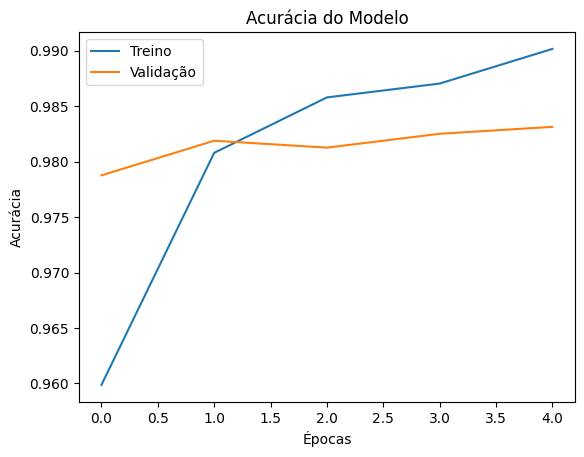

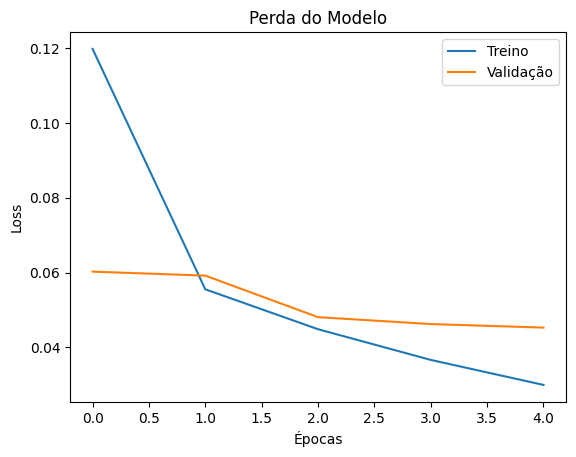

In [19]:
# Acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Perda
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Análise dos Gráficos

Os gráficos de acurácia e perda demonstram que o modelo teve um ótimo desempenho durante o treinamento. A acurácia aumentou de forma consistente, tanto nos dados de treino quanto nos de validação, alcançando cerca de 99% e 98% respectivamente. Já a perda (loss) apresentou uma queda significativa ao longo das épocas, indicando que o modelo aprendeu bem os padrões dos dados. Além disso, a diferença entre os conjuntos de treino e validação é pequena, o que mostra que o modelo generaliza bem e não está sofrendo overfitting.


In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/data/cats_dogs_files/test_set',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2023 images belonging to 2 classes.


In [21]:
loss, acc = model.evaluate(test_generator)
print(f"Acurácia no conjunto de teste: {acc * 100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 780ms/step - accuracy: 0.9814 - loss: 0.0567
Acurácia no conjunto de teste: 98.57%


# **Testando o Modelo com Imagens Reais**

Agora irei testar o desempenho do modelo utilizando duas imagens individuais: uma de gato e outra de cachorro. O objetivo é verificar se o modelo é capaz de realizar a classificação correta fora do conjunto de dados de treino e validação.


Cat Img
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


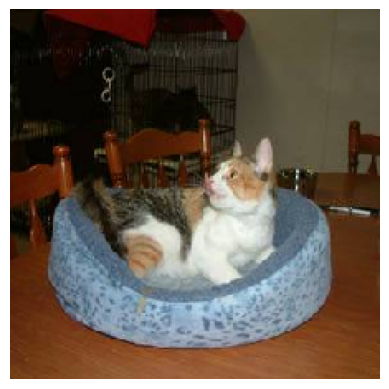


Dog Img
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


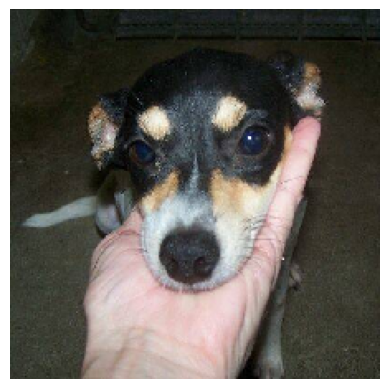

In [36]:
cat = '/content/data/cats_dogs_files/test_set/cats/cat.4035.jpg'
dog = '/content/data/cats_dogs_files/test_set/dogs/dog.4016.jpg'

# Gato
print('Cat Img')
print('-=' * 20)
cat = load_img(cat, target_size=(224, 224))
plt.imshow(cat)
plt.axis('off')
plt.show()

# Cachorro
print('\nDog Img')
print('-=' * 20)
dog = load_img(dog, target_size=(224, 224))
plt.imshow(dog)
plt.axis('off')
plt.show()

In [33]:
def prever_imagem(caminho_imagem, modelo, tamanho_img=(224, 224)):
    img = image.load_img(caminho_imagem, target_size=tamanho_img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    pred = modelo.predict(img_array)[0][0]

    if pred > 0.5:
        print(f"{caminho_imagem} → 🐶 Cachorro ({pred:.2f})")
    else:
        print(f"{caminho_imagem} → 🐱 Gato ({1 - pred:.2f})")

prever_imagem(cat, model)
prever_imagem(dog, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
/content/data/cats_dogs_files/test_set/cats/cat.4035.jpg → 🐱 Gato (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
/content/data/cats_dogs_files/test_set/dogs/dog.4016.jpg → 🐶 Cachorro (1.00)
